<h1>CNN Using CWT ProcessedSpectra as Inputs</h1>

<p>This notebook is used to train and explore a CNN model that classifies minerals by taking in spectra that have undergone continuous wavelet transformation using a ricker wavelet</p>

In [1]:
import numpy as np
import pandas as pd
import cnnmodelcwt as cnn_cwt
from tensorflow.keras.models import Model

<h1>Use this space below for fiddling with model training</h1>

<p>If you need to retrain the model, be sure to restart the runtime</p>

<h3>Define your Hyperparameters below</h3>

In [2]:
'''define the hyperparameters here!'''
learning_rate=0.001
batch_size=100
drop_rate=0.55
epochs=50

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]

In [3]:
'''define other parameters here!'''
#this string is prepended to all output files for identification
id_value='new_test'

#training data file path (do not include /content/drive/My Drive/ML Spectroscopy/)
fin_path=r'Data/CWT Data/Single/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/CWT/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
fast=True

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0.5


In [4]:
'''train the model'''
cnn_model,train_history,X_val,y_val=cnn_cwt.cwt_cnn_model(fin_path,mout_path,dev_size,r_state,hyperparameters,fast,id_value,threshold=threshold)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 950, 1)]          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 938, 8)            112       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 938, 8)            32        
_________________________________________________________________
relu1 (LeakyReLU)            (None, 938, 8)            0         
_________________________________________________________________
mpool1 (MaxPooling1D)        (None, 312, 8)            0         
_________________________________________________________________
conv2 (Conv1D)               (None, 308, 16)           656       
_________________________________________________________________
bn2 (BatchNormalization)     (None, 308, 16)          

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=range(0, 16) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15
true_0,1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_1,0,1184,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_2,0,0,1022,0,0,0,0,0,0,3,0,0,0,0,0,0
true_3,0,0,0,1439,0,0,0,0,0,0,0,0,0,0,0,1
true_4,0,0,0,0,1291,0,0,0,0,0,0,0,0,0,0,0
true_5,0,0,0,0,0,996,0,0,0,0,0,0,0,0,0,0
true_6,0,0,0,0,0,0,1156,0,0,0,0,0,0,0,0,0
true_7,0,0,0,0,0,0,0,1115,0,0,0,0,0,0,0,0
true_8,0,0,0,0,0,0,0,0,1163,0,0,0,0,0,0,1
true_9,1,0,0,0,0,0,0,0,0,1032,0,0,0,0,0,0


<h2><b>Test the model</b></h2>

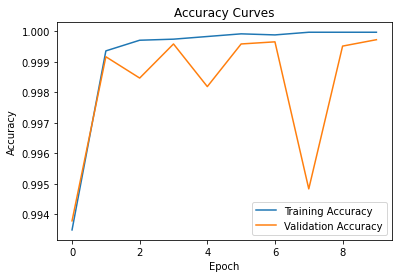

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pprint import pprint
from IPython.display import clear_output
from sklearn.metrics import roc_curve

train_accuracy = train_history.history['sparse_categorical_accuracy']
train_accuracy_df = pd.DataFrame(train_accuracy)
#train_accuracy_df.to_csv(train_accuracy_path, index = False, header = False)

val_accuracy = train_history.history['val_sparse_categorical_accuracy']
val_accuracy_df = pd.DataFrame(val_accuracy)
#val_accuracy_df.to_csv(val_accuracy_path, index = False, header = False)


plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

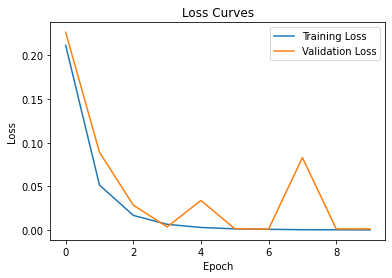

In [6]:
train_loss = train_history.history['loss']
train_loss_df = pd.DataFrame(train_loss)
#train_loss_df.to_csv(train_loss_path, index = False, header = False)

val_loss = train_history.history['val_loss']
val_loss_df = pd.DataFrame(val_loss)
#val_loss_df.to_csv(val_loss_path, index = False, header = False)

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [7]:


def plot_confusion_matrix(y_true, y_pred, title, path):
    import matplotlib.pyplot as plt
    labels = np.arange(15)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, columns = labels, index = labels)
    #cm_df.to_csv(path, index = True, header = True)
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'Actual'
    fig, ax = plt.subplots(figsize=(13,10))         # Sample figsize in inches
    sn.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'd', cbar = False)
    plt.title(title)
    plt.show()

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


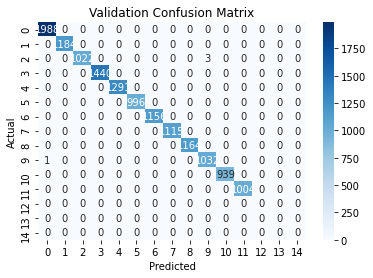

In [8]:
val_cm_path=r'Model Data/CNN Model/CWT/val_confusion_matrix_'+id_value+r'.csv'
plot_confusion_matrix(y_val, np.argmax(cnn_model.predict(X_val), axis = 1), 'Validation Confusion Matrix', val_cm_path)

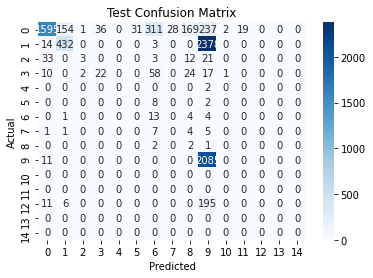

[[6.1949003e-03 1.1279364e-02 1.1911774e-05 ... 2.8790712e-01
  2.4273916e-04 2.0211629e-04]
 [2.2398224e-02 3.6065698e-02 2.2438997e-05 ... 1.5907396e-01
  9.0138277e-04 2.0176329e-04]
 [3.5080145e-04 1.6263848e-03 2.3380351e-05 ... 9.6546805e-01
  3.4027471e-04 1.0108719e-04]
 ...
 [9.9998212e-01 9.8092210e-07 4.2913265e-07 ... 2.4756919e-06
  1.1009110e-06 9.7960390e-07]
 [9.9998021e-01 6.8703440e-07 2.9008834e-07 ... 6.7762289e-06
  1.5038058e-06 1.2333663e-06]
 [9.9999356e-01 3.0493595e-07 3.4321315e-07 ... 1.0254722e-06
  6.4668632e-07 4.2979698e-07]]


In [9]:
testin_path=r'Data/CWT Data/Mixed/Test Set/'
test_cm_path=r'Model Data/CNN Model/CWT/test_confusion_matrix_'+id_value+r'.csv'

import helper as h
#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,split_df=False,dev_size=0.2,r_state=1,raw=True)


#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values


plot_confusion_matrix(y_test, np.argmax(cnn_model.predict(X_test), axis = 1), 'Test Confusion Matrix', test_cm_path) 
print(cnn_model.predict(X_test))

In [10]:
print(classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1)))

cr = classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1), output_dict = True)
cr_df = pd.DataFrame(cr).transpose()
#cr_df.to_csv(cr_path, index = True, header = True)

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.62      0.75      2583
           1       0.73      0.15      0.25      2827
           2       0.50      0.04      0.08        72
           3       0.38      0.16      0.23       134
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        10
           6       0.03      0.59      0.06        22
           7       0.00      0.00      0.00        18
           8       0.01      0.40      0.02         5
           9       0.42      0.99      0.59      2096
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00       212

    accuracy                           0.52      7981
   macro avg       0.23      0.23      0.15      7981
weighted avg       0.69      0.52      0.49      7981

